# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = r"C:\Users\User\Work\Self-Driving Cars ND\traffic-signs-data\train.p"
validation_file = r"C:\Users\User\Work\Self-Driving Cars ND\traffic-signs-data\valid.p"
testing_file = r"C:\Users\User\Work\Self-Driving Cars ND\traffic-signs-data\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(type(X_test))



<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
#print(train.keys())
#print(len(X_train))
print(X_test[0].shape)

(32, 32, 3)


In [3]:
import pandas

n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_test[0].shape

signnames = pandas.read_csv(r"C:\Users\User\Work\Self-Driving Cars ND\CarND-Traffic-Sign-Classifier-Project\signnames.csv")

n_classes = signnames.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

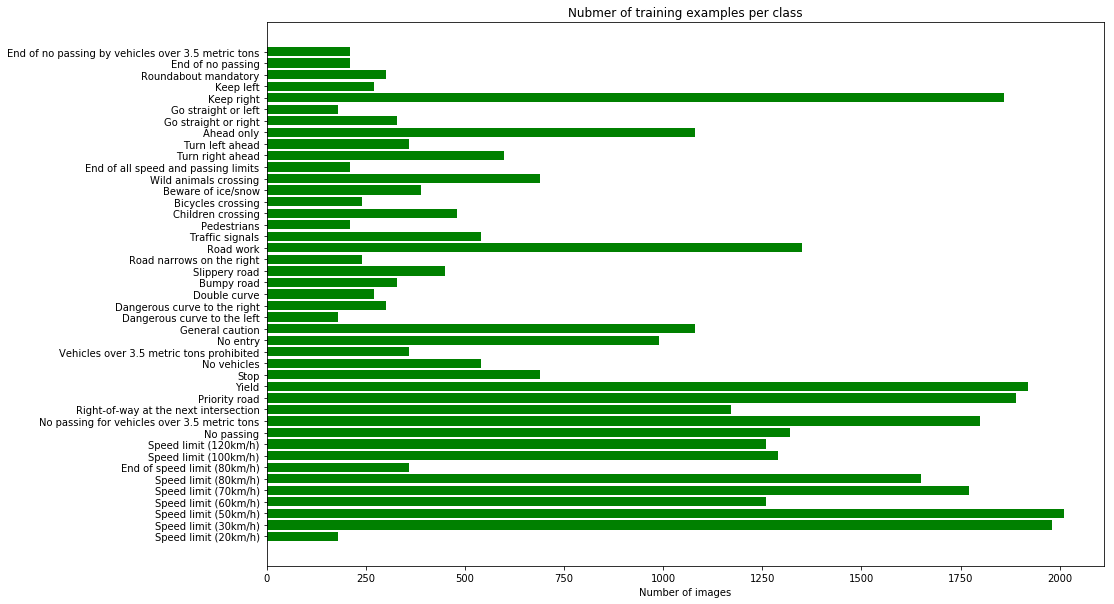

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

unique, counts = np.unique(y_train, return_counts=True)

data = pandas.read_csv('signnames.csv')
 
fig, ax = plt.subplots(figsize=(15,10))
y_pos = np.arange(len(unique))
ax.barh(y_pos, counts, align='center', color='green')
ax.set_yticks(y_pos) 
ax.set_yticklabels(data["SignName"].values)
ax.set_xlabel("Number of images")
plotName = 'Nubmer of training examples per class'
ax.set_title(plotName)
plt.show()
#fig.savefig(plotName+'.jpg')

## ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [6]:
import cv2

def ConvertToYUV(images):
    return np.array([cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0:1] for img in images])

In [7]:
def showImageGrayscale(image):
    grayscaleImage = ConvertToYUV([image])[0]
    plt.figure(figsize=(3,3))
    plt.imshow(grayscaleImage.squeeze(), cmap = 'gray')

C:\Users\User\Miniconda3\envs\carnd-term1-gpu\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


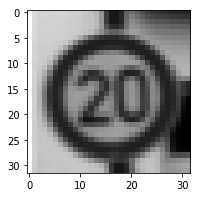

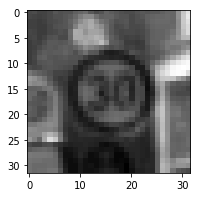

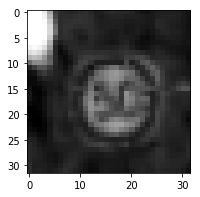

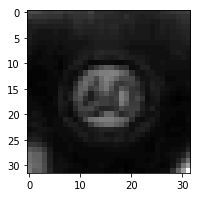

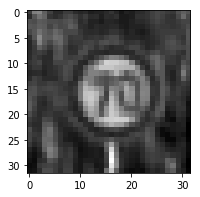

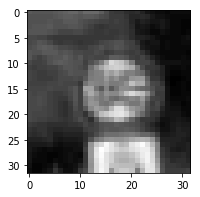

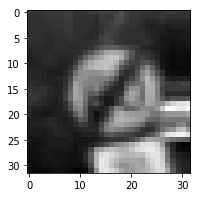

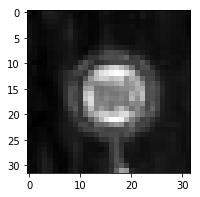

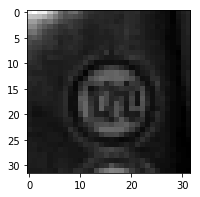

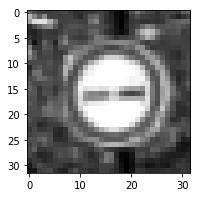

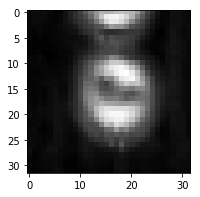

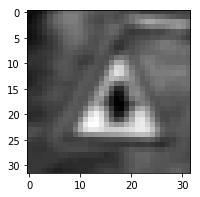

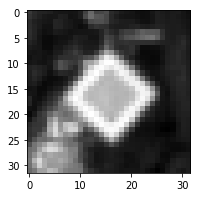

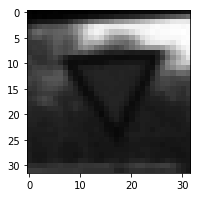

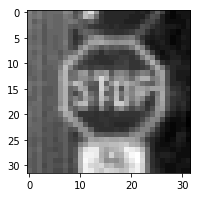

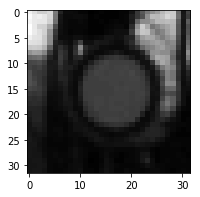

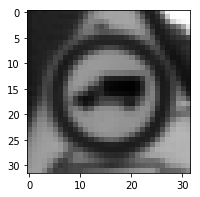

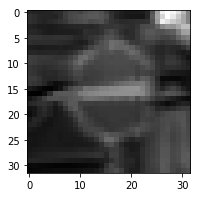

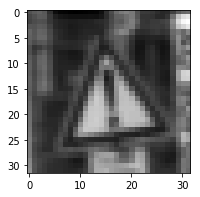

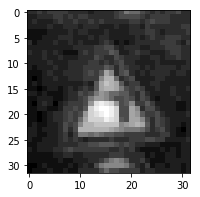

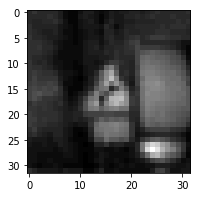

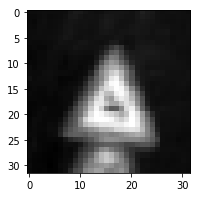

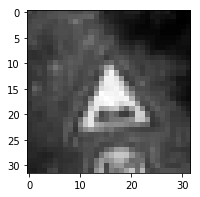

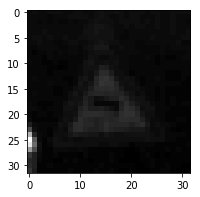

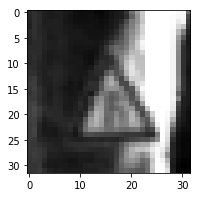

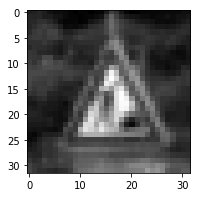

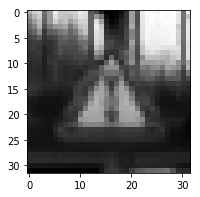

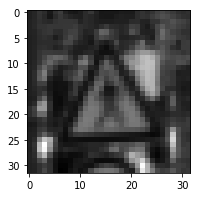

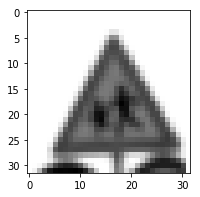

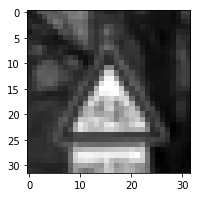

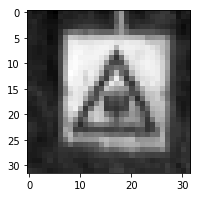

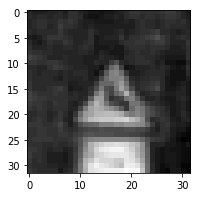

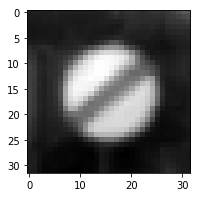

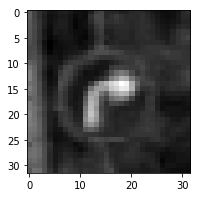

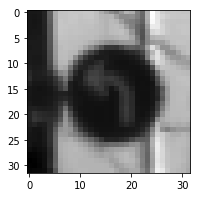

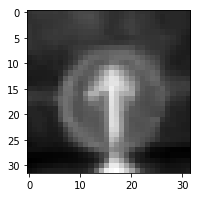

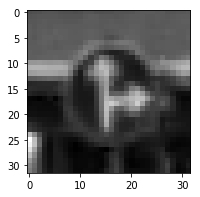

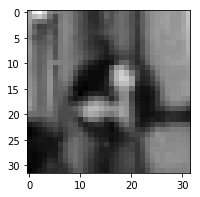

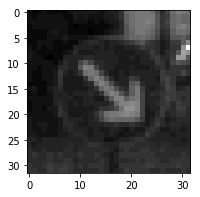

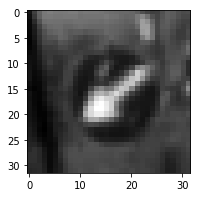

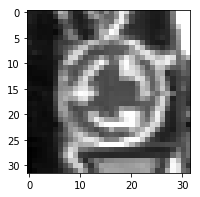

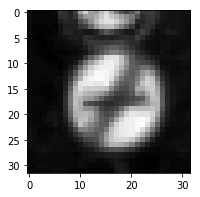

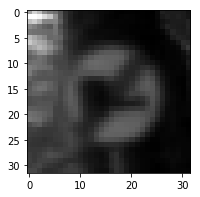

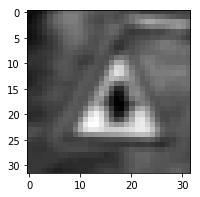

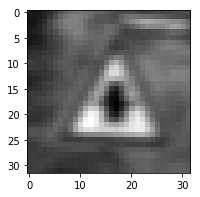

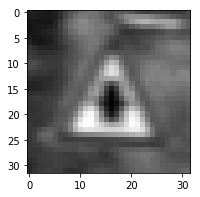

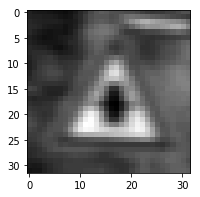

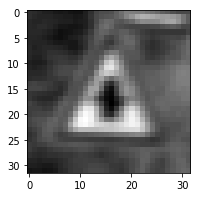

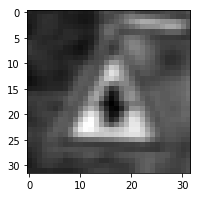

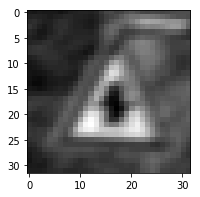

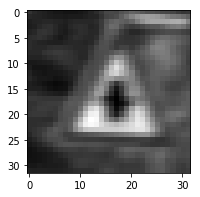

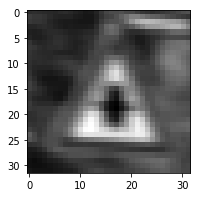

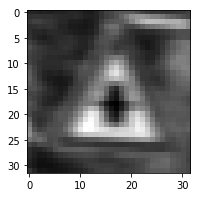

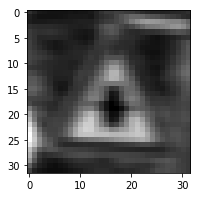

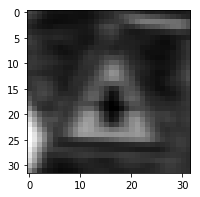

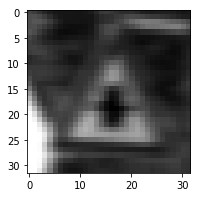

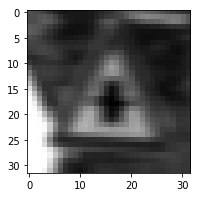

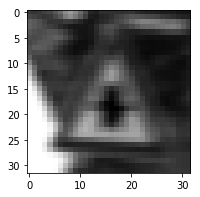

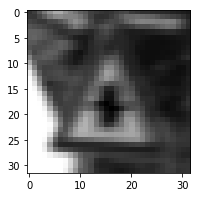

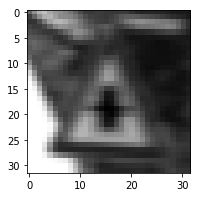

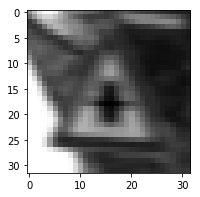

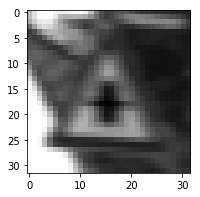

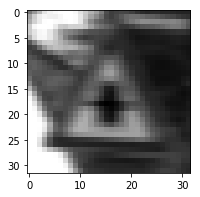

In [8]:
for i in range(0,43):
    signTrainingExamples = X_train[np.where(y_train == i)]
    showImageGrayscale(signTrainingExamples[0])
    
signTrainingExamples = X_train[np.where(y_train == 11)]
for i in range(0, 20):
    showImageGrayscale(signTrainingExamples[i])

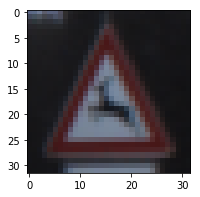

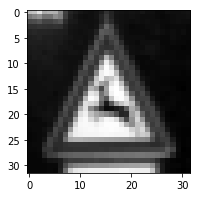

In [9]:
### save images for writeup
imageOrig = X_train[444]
plt.figure(figsize=(3,3))
fig = plt.imshow(imageOrig.squeeze())
fig.figure.savefig('imageOriginal.png')

imageGrayscale = ConvertToYUV([imageOrig])[0]
plt.figure(figsize=(3,3))
fig = plt.imshow(imageGrayscale.squeeze(),cmap = 'gray')
fig.figure.savefig('imageGrayscale.png')

<class 'numpy.ndarray'>


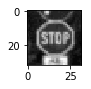

In [10]:


print(type(X_train))
X_train = ConvertToYUV(X_train)
X_valid = ConvertToYUV(X_valid)
X_test = ConvertToYUV(X_test)

image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

In [11]:
image_gs = X_train[0]

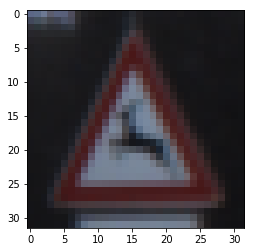

In [12]:
plt.imshow(imageOrig.squeeze())

### Normalize

In [13]:
from skimage import exposure
print(type(X_train))
def norm(images):
    images = [img / 255 for img in images]
    images = [exposure.equalize_hist(img)-.5 for img in images]
    return np.array(images)

X_train = norm(X_train)
X_valid = norm(X_valid) 
X_test = norm(X_test)

<class 'numpy.ndarray'>


C:\Users\User\Miniconda3\envs\carnd-term1-gpu\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


### Shuffle

In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

I implemeted a model described [here](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It is a 2-stage ConvNet architecture. The input is processed in a feedforwardmanner through two stage of convolutions and subsampling, and finally classified with a linear classifier. The output of the 1st stage is also fed directly to the classifier as higher-resolution features.
Each of two convolutions have 128 filters. Classifier consists of two layers, with 100 hidden units. I also applied a second subsampling stage for output of first stage before feeding it for classifier.
The dropout is used to prevent overfitting.

### Setup TensorFlow

In [15]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

In [16]:
from tensorflow.contrib.layers import flatten

def Model(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    numFilters = (128, 128)
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, numFilters[0]), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(numFilters[0]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    #dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Pooling. Input = 28x28x6. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # Layer 2: Convolutional. Output = 10x10x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, numFilters[0], numFilters[1]), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(numFilters[1]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.dropout(conv2, keep_prob)
    # Pooling. Input = 10x10x16. Output = 5x5x128.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #   Flatten. Input = 5x5x128 + 7x7x128. Output = 9472.        
    conv1Subsampled = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
     
    fc0 = tf.concat([flatten(conv2), flatten(conv1Subsampled)], axis=1)
    
    # Layer 3: Fully Connected.      
    hiddenLayerSize = 100
    layer3Shape = (7*7*numFilters[0] + 5*5*numFilters[1], hiddenLayerSize)
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=layer3Shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(hiddenLayerSize))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected.  
    layer4Shape = (hiddenLayerSize, n_classes)
    fc2_W  = tf.Variable(tf.truncated_normal(shape=layer4Shape, mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(n_classes))
    logits    = tf.matmul(fc1, fc2_W) + fc2_b
        
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Features and Labels
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

In [19]:
rate = 0.001
keep_prob = tf.placeholder(tf.float32)

logits = Model(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetMod')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.819

EPOCH 2 ...
Validation Accuracy = 0.899

EPOCH 3 ...
Validation Accuracy = 0.930

EPOCH 4 ...
Validation Accuracy = 0.928

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.941

EPOCH 9 ...
Validation Accuracy = 0.963

EPOCH 10 ...
Validation Accuracy = 0.953

EPOCH 11 ...
Validation Accuracy = 0.954

EPOCH 12 ...
Validation Accuracy = 0.962

EPOCH 13 ...
Validation Accuracy = 0.955

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.951

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.948

EPOCH 18 ...
Validation Accuracy = 0.953

EPOCH 19 ...
Validation Accuracy = 0.963

EPOCH 20 ...
Validation Accuracy = 0.945

EPOCH 21 ...
Validation Accuracy = 0.965

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.958

EPOCH 24 ...
Validation Accura

### Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    tf.argmax(logits, 1)
    test_accuracy = evaluate(X_train, y_train)
    print("Train set accuracy = {:.3f}".format(test_accuracy))

Train set accuracy = 0.999


In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    tf.argmax(logits, 1)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

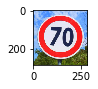

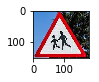

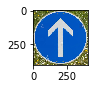

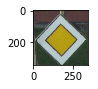

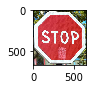

In [25]:
filePaths = [r'sign examples\image{}.jpg'.format(i) for i in range(1,6)]
images = [cv2.cvtColor(cv2.imread(filePath), cv2.COLOR_BGR2RGB) for filePath in filePaths]

for image in images:
    plt.figure(figsize=(1,1))
    plt.imshow(image)

resizedImages = [cv2.resize(image, (32,32)) for image in images]
plt.figure(figsize=(1,1))

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [27]:
processedImages = norm(ConvertToYUV(resizedImages))

import csv
signDict = {}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    signDict = {rows[0]:rows[1] for rows in reader}
    
predict = tf.argmax(logits, 1)

C:\Users\User\Miniconda3\envs\carnd-term1-gpu\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(predict, feed_dict = {x:processedImages, keep_prob:1})

correctSignIds = [4,28,35,12,14]

for prediction, correctId in zip(predictions, correctSignIds):
    print("\"{}\" sign was recognized as \"{}\" sign".format(signDict[str(correctId)], signDict[str(prediction)]))
       

"Speed limit (70km/h)" sign was recognized as "Speed limit (70km/h)" sign
"Children crossing" sign was recognized as "Children crossing" sign
"Ahead only" sign was recognized as "Ahead only" sign
"Priority road" sign was recognized as "Priority road" sign
"Stop" sign was recognized as "Speed limit (60km/h)" sign


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    tf.argmax(logits, 1)
    test_accuracy = evaluate(processedImages, correctSignIds)
    print("Test Accuracy for 5 new images is {:.3f}".format(test_accuracy))

Test Accuracy for 5 new images is 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Top 5 Softmax Probabilities For Each Image Found on the Web

In [33]:
getProbabilities = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probabilities = sess.run(getProbabilities, feed_dict = {x:processedImages, keep_prob:1})
    top5 = sess.run(tf.nn.top_k(tf.constant(probabilities), k=5))
    print(top5)       

TopKV2(values=array([[9.3909049e-01, 6.0909465e-02, 3.0927812e-14, 3.2040394e-17,
        1.8722891e-17],
       [9.9992549e-01, 7.2761453e-05, 1.1015923e-06, 5.1710612e-07,
        9.7121905e-08],
       [1.0000000e+00, 1.3787635e-13, 1.7717109e-14, 4.4900719e-16,
        1.5474755e-18],
       [1.0000000e+00, 4.7568312e-15, 1.4607077e-16, 2.3880259e-17,
        8.3070291e-18],
       [7.8558636e-01, 1.2330136e-01, 9.0914108e-02, 7.5936841e-05,
        7.0734968e-05]], dtype=float32), indices=array([[ 4,  0,  1, 14, 18],
       [28, 11,  3, 27, 19],
       [35, 36,  9, 28,  3],
       [12, 35,  9,  3, 28],
       [ 3, 14,  0, 29,  1]]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.